In [126]:
import pandas as pd
import random
import numpy as np
from citipy import citipy
import requests
import json 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import datetime
from config import api_key
%matplotlib inline

now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")

In [127]:
location_df = pd.DataFrame()
location_df['latitude'] = [np.random.uniform(-90, 90) for x in range(1500)]
location_df['longitude'] = [np.random.uniform(-180, 180) for x in range(1500)]

city_list = []
country_list = []
for index, row in location_df.iterrows():
    city = citipy.nearest_city(row['latitude'], row['longitude']).city_name
    country = citipy.nearest_city(row['latitude'], row['longitude']).country_code
    city_list.append(city)
    country_list.append(country)
location_df['city'] = city_list
location_df['country code'] = country_list

In [128]:
city_df = location_df.drop_duplicates('city')
city_df = city_df.set_index('city')
city_df['temperature F'] = ""
city_df['humidity %'] = ""
city_df['wind speed mph'] = ""
city_df['cloudiness %'] = ""
city_df.head()


,latitude,longitude,country code,temperature F,humidity %,wind speed mph,cloudiness %
city,,,,,,,
saint george,33.624541,-52.186872,bm,,,,
bluff,-59.968601,158.932115,nz,,,,
cayenne,7.021873,-47.224933,gf,,,,
new norfolk,-65.053606,138.201147,au,,,,
hithadhoo,-21.949108,85.403747,mv,,,,


In [129]:
counter = 1
for index, row in city_df.iterrows():
    url = f'http://api.openweathermap.org/data/2.5/weather?q={index}&appid={api_key}&units=imperial'
    city_data = requests.get(url).json()
    try:
        temp = city_data['main']['temp'] 
        humidity = city_data['main']['humidity'] 
        wind = city_data['wind']['speed']
        cloudiness = city_data['clouds']['all']
        city_df.set_value(index,'temperature F', temp)
        city_df.set_value(index,'humidity %', humidity)
        city_df.set_value(index,'wind speed mph', wind)
        city_df.set_value(index,'cloudiness %', cloudiness)
        text_file = open("cities_gathered.txt", "a+",  newline="\n")
        text_file.write(f' data gathered for city #{counter} {index} from {url} \n')
        text_file.close()
    except: 
        print(f' no data gathered for city #{counter} {index} from {url}')
        text_file = open("null_cities.txt", "a+",  newline="\n")
        text_file.write(f' no data gathered for city #{counter} {index} from {url} \n')
        text_file.close()
    counter += 1 

C:\Users\thats\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\thats\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\thats\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\thats\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors 

 no data gathered for city #20 rolim de moura from http://api.openweathermap.org/data/2.5/weather?q=rolim de moura&appid=880045f7d8ffa29a81409cfca0336f8d&units=imperial
 no data gathered for city #33 bengkulu from http://api.openweathermap.org/data/2.5/weather?q=bengkulu&appid=880045f7d8ffa29a81409cfca0336f8d&units=imperial
 no data gathered for city #66 tumannyy from http://api.openweathermap.org/data/2.5/weather?q=tumannyy&appid=880045f7d8ffa29a81409cfca0336f8d&units=imperial
 no data gathered for city #70 kopyevo from http://api.openweathermap.org/data/2.5/weather?q=kopyevo&appid=880045f7d8ffa29a81409cfca0336f8d&units=imperial
 no data gathered for city #75 taolanaro from http://api.openweathermap.org/data/2.5/weather?q=taolanaro&appid=880045f7d8ffa29a81409cfca0336f8d&units=imperial
 no data gathered for city #87 bargal from http://api.openweathermap.org/data/2.5/weather?q=bargal&appid=880045f7d8ffa29a81409cfca0336f8d&units=imperial
 no data gathered for city #94 ayios kirikos from 

 no data gathered for city #603 samalaeulu from http://api.openweathermap.org/data/2.5/weather?q=samalaeulu&appid=880045f7d8ffa29a81409cfca0336f8d&units=imperial
 no data gathered for city #606 el wasta from http://api.openweathermap.org/data/2.5/weather?q=el wasta&appid=880045f7d8ffa29a81409cfca0336f8d&units=imperial


In [130]:

city_df = city_df[city_df['temperature F'] != ""]
city_df.head()
city_df['latitude'].dtype

dtype('float64')

In [131]:

colors = []
for latitude in city_df['latitude']:
    if latitude > 0:
        color = 'blue'
        colors.append(color)
    else:
        color = 'red'
        colors.append(color)
city_df['color'] = colors
city_df.head()


,latitude,longitude,country code,temperature F,humidity %,wind speed mph,cloudiness %,color
city,,,,,,,,
saint george,33.624541,-52.186872,bm,73.4,73,3.36,40,blue
bluff,-59.968601,158.932115,nz,44.66,82,2.71,12,red
cayenne,7.021873,-47.224933,gf,80.6,83,5.82,0,blue
new norfolk,-65.053606,138.201147,au,46.4,65,12.75,40,red
hithadhoo,-21.949108,85.403747,mv,82.19,100,19.71,76,red


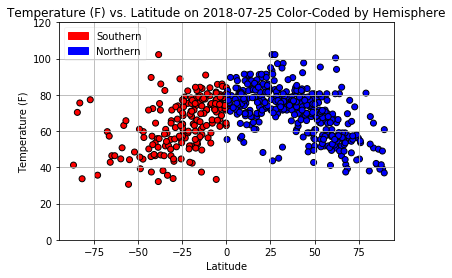

In [132]:
#Temperature (F) vs. Latitude
plt.scatter(city_df['latitude'], city_df['temperature F'], edgecolors = 'black', color = city_df['color'])
plt.grid()
plt.title(f'Temperature (F) vs. Latitude on {date} Color-Coded by Hemisphere')
plt.xlabel('Latitude')
plt.xlim(-95, 95, 25)
plt.ylim(0, 120, 25)
plt.ylabel('Temperature (F)')
red_patch = mpatches.Patch(color='red', label='Southern')
blue_patch = mpatches.Patch(color='blue', label='Northern')
plt.legend(handles=[red_patch, blue_patch], framealpha=0.2)


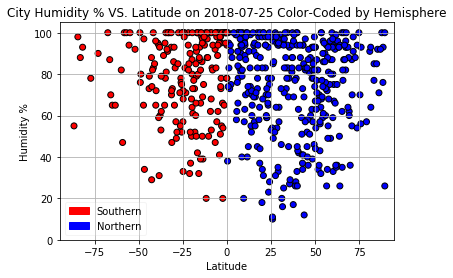

In [133]:
plt.scatter(city_df['latitude'], city_df['humidity %'], edgecolors = 'black', color = city_df['color'])
plt.title(f'City Humidity % VS. Latitude on {date} Color-Coded by Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.xlim(-95, 95, 25)
plt.ylim(0, 105, 20)
red_patch = mpatches.Patch(color='red', label='Southern')
blue_patch = mpatches.Patch(color='blue', label='Northern')
plt.legend(handles=[red_patch, blue_patch], framealpha=0.2)

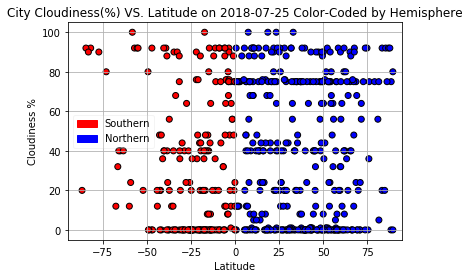

In [134]:
plt.scatter(city_df['latitude'], city_df['cloudiness %'], edgecolors = 'black', color = city_df['color'])
plt.title(f'City Cloudiness(%) VS. Latitude on {date} Color-Coded by Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.xlim(-95, 95)
plt.ylim(-5, 105)
red_patch = mpatches.Patch(color='red', label='Southern')
blue_patch = mpatches.Patch(color='blue', label='Northern')
plt.legend(handles=[red_patch, blue_patch], framealpha=0.2)

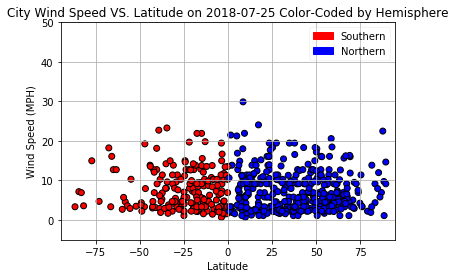

In [135]:
plt.scatter(city_df['latitude'], city_df['wind speed mph'], edgecolors = 'black', color = city_df['color'])
plt.xlim(-95, 95)
plt.ylim(-5, 50)
plt.grid()
plt.title(f'City Wind Speed VS. Latitude on {date} Color-Coded by Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
red_patch = mpatches.Patch(color='red', label='Southern')
blue_patch = mpatches.Patch(color='blue', label='Northern')
plt.legend(handles=[red_patch, blue_patch], framealpha=0.2)

1) Windspeeds are Relatively constant around the globe 
2) Max temperature generally rises as one approaches the equator and drops the further one get from it. 
3) Cloudiness is unpredictible in relation to Latitude. 
4) Humidity is everywhere. 